# Singing Stars

In [167]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
from kepler_data import load_kepler_data
import h5py

A pure sine wave

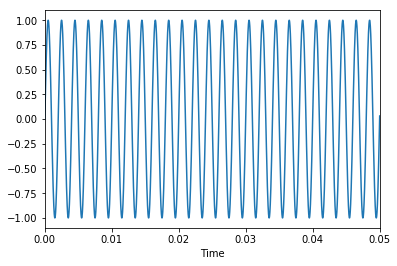

In [168]:
time = np.arange(0, 5e-1, 1e-5)
frequency = 500.
flux = np.sin(2*np.pi*frequency*time)
plt.xlabel("Time")
plt.xlim(0, .05)
plt.plot(time, flux)

Play the waveform...

In [169]:
Audio(data=flux, rate=44100)

A superposition of two sinusoids

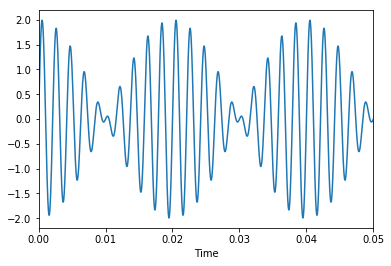

In [170]:
flux += np.sin(2*np.pi*.9*frequency*time)
plt.xlabel("Time")
plt.xlim(0, .05)
plt.plot(time, flux)

In [171]:
Audio(data=flux, rate=44100)

Three sinusoids

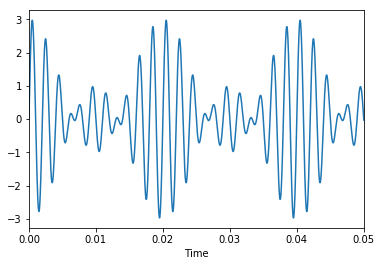

In [172]:
flux += np.sin(2*np.pi*1.1*frequency*time)
plt.xlabel("Time")
plt.xlim(0, .05)
plt.plot(time, flux)

In [173]:
Audio(data=flux, rate=44100)

Adding white noise

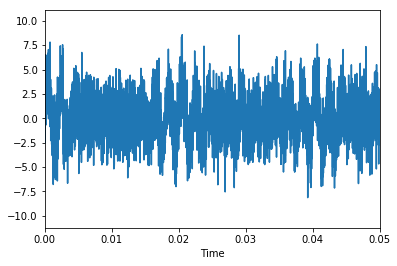

In [174]:
flux += np.random.randn(len(time)) * 2
plt.xlabel("Time")
plt.xlim(0, .05)
plt.plot(time, flux)

In [175]:
Audio(data=flux, rate=44100)

# The Sound of the Sun...

Now a real Kepler light curve: a seismic oscillator

(0, 100)

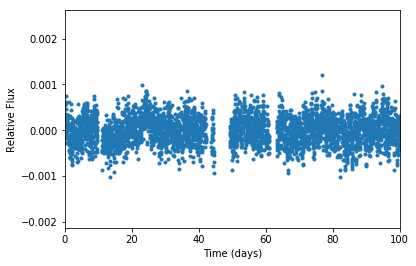

In [176]:
x, y, yerr = load_kepler_data("/Users/ruthangus/.kplr/data/lightcurves/005515314")
plt.plot(x-x[0], y, ".")
plt.xlabel("Time (days)")
plt.ylabel("Relative Flux")
plt.xlim(0, 100)

In [177]:
Audio(data=y, rate=44100)

In [178]:
with h5py.File("dataset.h5", "r") as f:
    k = np.arange(f["lcs"].shape[0])
    np.random.seed(1234)
    np.random.shuffle(k)
    lc = f["lcs"][np.sort(k[:5000]), :]

An exoplanet host

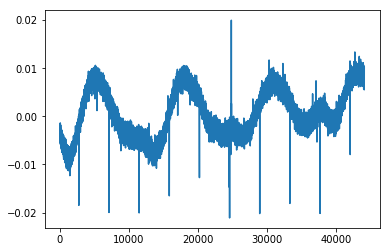

In [179]:
plt.plot(lc[0, :])

In [180]:
Audio(data=lc[0, :], rate=44100)

Now some machine learning magic...

In [153]:
from scipy.io import wavfile 
from scipy.signal import butter, lfilter, freqz
from sklearn.linear_model import Lasso
from pydub import AudioSegment

/Users/ruthangus/anaconda/lib/python3.5/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Fit thousands of sonified Kepler light curves to a pop song.

In [164]:
k = 10  
n = lc.shape[1]  
y = samps[44100*10 + n:, 0][::k]  
X = np.concatenate((lc, np.ones((1, lc.shape[1]))))[:, ::k].T
rate, samps = wavfile.read("full_song.wav")
a1 = np.linspace(-.01, -5, 15)  # gradually turn down the regularisation over 15 secs
a2 = np.ones(30)*-5  # hold the regularisation at a low value for 30 secs
a3 = np.linspace(-5, -.01, 15)  # turn up the regularisation at the end
a = np.concatenate((a1, a2, a3))
for i in range(len(a)):
    y = samps[44100*i:44100*(i+1), 0][::k]  
    X = np.concatenate((lc, np.ones((1, lc.shape[1]))))[:, ::k].T
    model = Lasso(alpha=10**a[i])
    model.fit(X, y)
    p = model.predict(X)
    wavfile.write('%sfull.wav' % i, rate, p.astype(np.int16))

/Users/ruthangus/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/Users/ruthangus/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [165]:
from pydub import AudioSegment
song = AudioSegment.from_wav("0full.wav")
for i in range(1, 59):
    song += AudioSegment.from_wav("%sfull.wav" % i)
song.export("songfull.wav", format="wav")

<_io.BufferedRandom name='songfull.wav'>

Play the pop song.

In [166]:
rate, samps = wavfile.read("songfull.wav")
Audio(data=samps, rate=4410)